In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train=pd.read_excel("2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx")
test=pd.read_excel("2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_평가데이터_210803.xlsx")

In [8]:
train.head()

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,데이터집단 2,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,데이터집단 3,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,데이터 집단 4,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,데이터 집단 5,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,데이터 집단 6,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,NaN,NaN,NaN,NaN,NaN,NaN,유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역)
1,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,8,2.54,122.569,6.3,7,7,7,8,2.54,122.542,6.3,7,7,7,8,2.54,122.55,6.4,7,7,8,8,2.54,122.675,6.4,7,7,8,8,2.54,122.66,6.4,7,7,8,8,2.54,122.61
2,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,8,2.53,122.562,6.4,7,8,7,8,2.53,122.55,6.4,7,8,7,8,2.53,122.558,7.3,7,8,10,10,2.53,122.668,7.3,7,8,10,10,2.53,122.648,7.3,7,8,10,10,2.53,122.6
3,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,8,2.53,122.556,7.3,7,9,7,8,2.53,122.558,7.3,7,9,8,8,2.53,122.567,8.2,7,9,10,11,2.53,122.661,8.2,7,9,10,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59
4,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3,7,10,7,8,2.53,122.556,8.2,7,10,8,8,2.53,122.567,8.2,7,10,10,10,2.53,122.575,11.3,9,10,15,14,2.53,122.654,11.3,9,10,15,14,2.53,122.62,11.3,9,10,15,14,2.53,122.585


In [9]:
train=train.drop(labels=0,axis=0)
column=['홍수사상번호','연','월','일','시간','유입량','1유역평균강수','1강우A','1강우B','1강우C','1강우D','1수위E','1수위D','2유역평균강수','2강우A','2강우B','2강우C','2강우D','2수위E','2수위D','3유역평균강수','3강우A','3강우B','3강우C','3강우D','3수위E','3수위D','4유역평균강수','4강우A','4강우B','4강우C','4강우D','4수위E','4수위D','5유역평균강수','5강우A','5강우B','5강우C','5강우D','5수위E','5수위D','6유역평균강수','6강우A','6강우B','6강우C','6강우D','6수위E','6수위D']
train.columns=column

In [10]:
train.head(3)

,홍수사상번호,연,월,일,시간,유입량,1유역평균강수,1강우A,1강우B,1강우C,1강우D,1수위E,1수위D,2유역평균강수,2강우A,2강우B,2강우C,2강우D,2수위E,2수위D,3유역평균강수,3강우A,3강우B,3강우C,3강우D,3수위E,3수위D,4유역평균강수,4강우A,4강우B,4강우C,4강우D,4수위E,4수위D,5유역평균강수,5강우A,5강우B,5강우C,5강우D,5수위E,5수위D,6유역평균강수,6강우A,6강우B,6강우C,6강우D,6수위E,6수위D
1,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,8,2.54,122.569,6.3,7,7,7,8,2.54,122.542,6.3,7,7,7,8,2.54,122.55,6.4,7,7,8,8,2.54,122.675,6.4,7,7,8,8,2.54,122.66,6.4,7,7,8,8,2.54,122.61
2,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,8,2.53,122.562,6.4,7,8,7,8,2.53,122.55,6.4,7,8,7,8,2.53,122.558,7.3,7,8,10,10,2.53,122.668,7.3,7,8,10,10,2.53,122.648,7.3,7,8,10,10,2.53,122.6
3,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,8,2.53,122.556,7.3,7,9,7,8,2.53,122.558,7.3,7,9,8,8,2.53,122.567,8.2,7,9,10,11,2.53,122.661,8.2,7,9,10,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [11]:
train.info()
print("test 해야할 행 수 : ",3051-2891," == test 행 수")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051 entries, 1 to 3051
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   홍수사상번호   3051 non-null   float64
 1   연        3051 non-null   float64
 2   월        3051 non-null   float64
 3   일        3051 non-null   float64
 4   시간       3051 non-null   float64
 5   유입량      2891 non-null   float64
 6   1유역평균강수  3051 non-null   object 
 7   1강우A     3051 non-null   object 
 8   1강우B     3051 non-null   object 
 9   1강우C     3051 non-null   object 
 10  1강우D     3051 non-null   object 
 11  1수위E     3051 non-null   object 
 12  1수위D     3051 non-null   object 
 13  2유역평균강수  3051 non-null   object 
 14  2강우A     3051 non-null   object 
 15  2강우B     3051 non-null   object 
 16  2강우C     3051 non-null   object 
 17  2강우D     3051 non-null   object 
 18  2수위E     3051 non-null   object 
 19  2수위D     3051 non-null   object 
 20  3유역평균강수  3051 non-null   object 
 21  3강우A     3051 

In [12]:
test.head()

,NO,홍수사상번호,연,월,일,시간,유입량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,26.0,2018.0,7.0,1.0,6.0,NaN
2,2.0,26.0,2018.0,7.0,1.0,7.0,NaN
3,3.0,26.0,2018.0,7.0,1.0,8.0,NaN
4,4.0,26.0,2018.0,7.0,1.0,9.0,NaN


In [13]:
test=test.drop(labels=0 ,axis=0)

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 1 to 160
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NO      160 non-null    float64
 1   홍수사상번호  160 non-null    float64
 2   연       160 non-null    float64
 3   월       160 non-null    float64
 4   일       160 non-null    float64
 5   시간      160 non-null    float64
 6   유입량     0 non-null      float64
dtypes: float64(7)
memory usage: 10.0 KB


In [15]:
print('train shape : ', train.shape, 'test shape : ',test.shape)

train shape :  (3051, 48) test shape :  (160, 7)


In [16]:
new_train=train.iloc[:2891,:]
new_test=train.iloc[2891:,:]
X_train=new_train.drop(columns=['유입량'],axis=1)
Y_train=new_train['유입량']

In [53]:
print(train['1수위E'].mean())
print(train['2수위E'].mean())
print(train['3수위E'].mean())
print(train['4수위E'].mean())
print(train['5수위E'].mean())
print(train['6수위E'].mean())

4.564936086528995
4.564936086528995
4.564936086528995
4.564936086528995
4.564936086528995
4.564936086528995


#년 월 시 별 평균

##연

In [17]:
print(train['연'].unique())
years=[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017]

[2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2017. 2018.]


In [54]:
graph_x=list()
graph_y=list()
for i in years:
    temp_mean=new_train[new_train['연']==i]['유입량'].mean()
    temp_len=len(new_train[new_train['연']==i])
    print(i,"년에서의 유입량 평균",temp_mean, "데이터수 : ",temp_len)
    graph_x.append(i)
    graph_y.append(temp_mean)

graph_x.sort()

2006 년에서의 유입량 평균 4017.2131236699393 데이터수 :  326
2007 년에서의 유입량 평균 1787.9579105208695 데이터수 :  115
2008 년에서의 유입량 평균 2626.792297278085 데이터수 :  94
2009 년에서의 유입량 평균 1942.5283791525305 데이터수 :  292
2010 년에서의 유입량 평균 1680.9884206668785 데이터수 :  237
2011 년에서의 유입량 평균 1661.7498653282096 데이터수 :  709
2012 년에서의 유입량 평균 983.6440902795267 데이터수 :  508
2013 년에서의 유입량 평균 1149.853317194915 데이터수 :  413
2017 년에서의 유입량 평균 861.8112948505585 데이터수 :  197


년도별 데이터수가 많이 달라서 영향을 많이 미치는지는 않는 것 같다

https://www.etoday.co.kr/news/view/1925778

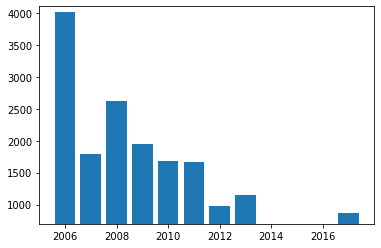

In [20]:
plt.bar(graph_x,graph_y)
plt.ylim(700,4100)
plt.show()

##월

In [21]:
print(train['월'].unique())

[7. 8. 9. 6.]


In [22]:
graph_x=list()
graph_y=list()
for i in range(6,10):
    temp_mean=new_train[new_train['월']==i]['유입량'].mean()
    print(i,"월에서의 유입량 평균",temp_mean)
    graph_x.append(i)
    graph_y.append(temp_mean)

6 월에서의 유입량 평균 1873.9254853740003
7 월에서의 유입량 평균 1997.9886026154563
8 월에서의 유입량 평균 1086.374202842913
9 월에서의 유입량 평균 1640.2814136786649


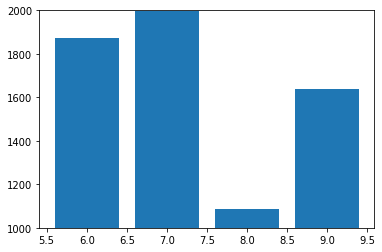

In [23]:
plt.bar(graph_x,graph_y)
plt.ylim(1000,2000)
plt.show()

##시

In [24]:
graph_x=list()
graph_y=list()
for i in range(1,25):
    temp_mean=new_train[new_train['시간']==i]['유입량'].mean()
    print(i,"시에서의 유입량 평균",temp_mean)
    graph_x.append(i)
    graph_y.append(temp_mean)

1 시에서의 유입량 평균 1748.6875354237393
2 시에서의 유입량 평균 1734.2900072452467
3 시에서의 유입량 평균 1725.5770979150834
4 시에서의 유입량 평균 1694.8184494539832
5 시에서의 유입량 평균 1671.532986667648
6 시에서의 유입량 평균 1675.4696065625428
7 시에서의 유입량 평균 1667.5847824257978
8 시에서의 유입량 평균 1649.5747431785655
9 시에서의 유입량 평균 1677.6943076808268
10 시에서의 유입량 평균 1700.7545085028928
11 시에서의 유입량 평균 1742.8012693315588
12 시에서의 유입량 평균 1768.455535363815
13 시에서의 유입량 평균 1800.607846571624
14 시에서의 유입량 평균 1797.4851935564698
15 시에서의 유입량 평균 1794.2827865628094
16 시에서의 유입량 평균 1794.2592502620494
17 시에서의 유입량 평균 1773.6467794225412
18 시에서의 유입량 평균 1787.315259160001
19 시에서의 유입량 평균 1776.4221248755373
20 시에서의 유입량 평균 1790.4152124006612
21 시에서의 유입량 평균 1778.5656436708127
22 시에서의 유입량 평균 1784.805446800001
23 시에서의 유입량 평균 1795.4971320713112
24 시에서의 유입량 평균 1791.3324351447961


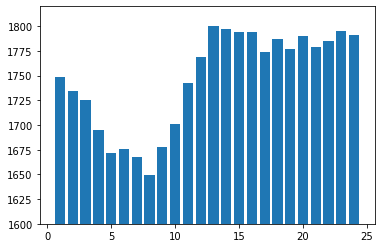

In [25]:
plt.bar(graph_x,graph_y)
plt.ylim(1600,1820)
plt.show()

강우량:순수하게 비만 내린 것을 측정한 값<br>
강수량:강우량+강설량(눈)


##같은 열

In [79]:
train[train['1강우A']!=train['1강우A']]

,홍수사상번호,연,월,일,시간,유입량,1유역평균강수,1강우A,1강우B,1강우C,1강우D,1수위E,1수위D,2유역평균강수,2강우A,2강우B,2강우C,2강우D,2수위E,2수위D,3유역평균강수,3강우A,3강우B,3강우C,3강우D,3수위E,3수위D,4유역평균강수,4강우A,4강우B,4강우C,4강우D,4수위E,4수위D,5유역평균강수,5강우A,5강우B,5강우C,5강우D,5수위E,5수위D,6유역평균강수,6강우A,6강우B,6강우C,6강우D,6수위E,6수위D


In [80]:
len(train[train['1강우A']!=train['1강우A']])

0

In [77]:
target_cols=[ '1강우A', '1강우B', '1강우C',
       '1강우D', '1수위E', '1수위D',  '2강우A', '2강우B', '2강우C', '2강우D',
       '2수위E', '2수위D',  '3강우A', '3강우B', '3강우C', '3강우D', '3수위E',
       '3수위D',  '4강우A', '4강우B', '4강우C', '4강우D', '4수위E', '4수위D',
        '5강우A', '5강우B', '5강우C', '5강우D', '5수위E', '5수위D',
       '6강우A', '6강우B', '6강우C', '6강우D', '6수위E', '6수위D']

for col1 in target_cols:
    for col2 in target_cols:
        if col1 !=col2 and len(train[train[col1]!=train[col2]]) ==0 :
            print(col1, col2)
            

1강우D 2강우D
1수위E 2수위E
1수위E 3수위E
1수위E 4수위E
1수위E 5수위E
1수위E 6수위E
2강우A 3강우A
2강우D 1강우D
2수위E 1수위E
2수위E 3수위E
2수위E 4수위E
2수위E 5수위E
2수위E 6수위E
3강우A 2강우A
3강우B 4강우B
3강우B 5강우B
3수위E 1수위E
3수위E 2수위E
3수위E 4수위E
3수위E 5수위E
3수위E 6수위E
4강우A 5강우A
4강우A 6강우A
4강우B 3강우B
4강우B 5강우B
4강우C 5강우C
4강우D 5강우D
4수위E 1수위E
4수위E 2수위E
4수위E 3수위E
4수위E 5수위E
4수위E 6수위E
5강우A 4강우A
5강우A 6강우A
5강우B 3강우B
5강우B 4강우B
5강우C 4강우C
5강우D 4강우D
5수위E 1수위E
5수위E 2수위E
5수위E 3수위E
5수위E 4수위E
5수위E 6수위E
6강우A 4강우A
6강우A 5강우A
6수위E 1수위E
6수위E 2수위E
6수위E 3수위E
6수위E 4수위E
6수위E 5수위E


#여러방법

In [30]:
new_train=train.iloc[:2891,:]
new_test=train.iloc[2891:,:]
X_train=new_train.drop(columns=['유입량'],axis=1)
Y_train=new_train['유입량']

## 아무것도 안 만짐

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_valid,y_valid))

0.9040095586325729


##유역평균강수만 뽑고 나머지는 버리기

In [44]:
new_train=train.iloc[:2891,:]
new_test=train.iloc[2891:,:]
X_train=new_train.drop(columns=['유입량'],axis=1)
Y_train=new_train['유입량']
X_train=X_train.drop(columns=[ '1강우A', '1강우B', '1강우C',
       '1강우D', '1수위E', '1수위D',  '2강우A', '2강우B', '2강우C', '2강우D',
       '2수위E', '2수위D',  '3강우A', '3강우B', '3강우C', '3강우D', '3수위E',
       '3수위D',  '4강우A', '4강우B', '4강우C', '4강우D', '4수위E', '4수위D',
        '5강우A', '5강우B', '5강우C', '5강우D', '5수위E', '5수위D',
       '6강우A', '6강우B', '6강우C', '6강우D', '6수위E', '6수위D'],axis=1)


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

In [46]:
x_train

,홍수사상번호,연,월,일,시간,1유역평균강수,2유역평균강수,3유역평균강수,4유역평균강수,5유역평균강수,6유역평균강수
656,8.0,2009.0,7.0,14.0,23.0,114.846,112.121,112.121,119.904,110.086,79.4238
290,2.0,2006.0,7.0,28.0,15.0,126.6,128.7,128.7,131.1,129.8,118.6
247,2.0,2006.0,7.0,26.0,20.0,20.5,20.6,20.6,20.9,20.9,20.9
2303,22.0,2013.0,7.0,8.0,11.0,3.6012,3.6291,3.6291,3.6698,3.6698,3.6698
1006,12.0,2010.0,9.0,21.0,17.0,31.752,35.6086,35.6086,40.2861,39.756,36.051
...,...,...,...,...,...,...,...,...,...,...,...
1639,16.0,2011.0,8.0,3.0,8.0,22.2989,22.1076,22.1076,21.2274,20.0513,14.4528
1096,13.0,2011.0,6.0,30.0,6.0,71.7088,76.1637,76.1637,81.4074,81.375,81.3333
1131,13.0,2011.0,7.0,1.0,17.0,85.8239,85.8239,85.8239,85.8239,85.8239,81.988
1295,15.0,2011.0,7.0,12.0,1.0,47.7383,47.7996,47.7996,47.9164,47.9164,47.8437


In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_valid,y_valid))

0.6348535045391911


In [48]:
y_pred=lr.predict(x_train)
y_pred[:10]

array([2598.42568359, 3944.68482171, 1138.96611336, -104.12034139,
        981.91042732,   73.52934969,  163.66534729, -175.03996037,
        448.83814098,  -63.1692137 ])

In [49]:
y_train[:10]

656     3733.869336
290     5942.082186
247      196.829472
2303      87.955369
1006     238.369158
2329     144.645695
2079     200.580027
1743     889.744450
533      775.154908
749       58.411156
Name: 유입량, dtype: float64

##유역평균+abcdede

In [55]:
new_train=train.iloc[:2891,:]
new_test=train.iloc[2891:,:]
X_train=new_train.drop(columns=['유입량'],axis=1)
Y_train=new_train['유입량']
X_train=X_train.drop(columns=[  '2강우A', '2강우B', '2강우C', '2강우D',
       '2수위E', '2수위D',  '3강우A', '3강우B', '3강우C', '3강우D', '3수위E',
       '3수위D',  '4강우A', '4강우B', '4강우C', '4강우D', '4수위E', '4수위D',
        '5강우A', '5강우B', '5강우C', '5강우D', '5수위E', '5수위D',
       '6강우A', '6강우B', '6강우C', '6강우D', '6수위E', '6수위D'],axis=1)


In [57]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_valid,y_valid))

0.8854131058972271
